# Data Scientist Challenge - LATAM Airlines
- Autor: Joaquín Pérez L.  (_<jperezlapillo@gmail.cl>_)
- Fecha: 20 de Abril de 2022
__________________________________________________________

## Contenido
0. [Pre-procesamiento](#seccion0)
1. [¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?](#seccion1)
2. [Genera las columnas adicionales y luego expórtelas en un archivo](#seccion2)
3. [¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?](#seccion3)
4. [Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.](#seccion4)
5. [Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?](#seccion5)

## 0. Pre-procesamiento <a name="seccion0"></a>

In [4]:
# Importamos el dataset
import pandas as pd
df = pd.read_csv("dataset_SCL.csv", low_memory=False)

In [5]:
# Chequeamos la estructura general del dataset
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In [6]:
# Resumen del tipo de datos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [7]:
# Chequeo de missing values
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [8]:
# Existe un missing de la columna Vlo-O (número de vuelo)
df[df["Vlo-O"].isnull()]

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
6068  2017-01-19 11:00:00   200  SCEL  SPJC   LAW  2017-01-19 11:03:00   NaN   

     Ori-O Des-O Emp-O  DIA  MES   AÑO  DIANOM TIPOVUELO  \
6068  SCEL  SPJC   56R   19    1  2017  Jueves         I   

                     OPERA  SIGLAORI SIGLADES  
6068  Latin American Wings  Santiago     Lima

In [9]:
# Se imputa con la información de la columna Vlo-I (Programado)
valor_to_imp = df.iloc[df[df["Vlo-O"].isnull()].index]["Vlo-I"].values[0]
df.loc[df[df["Vlo-O"].isnull()].index,"Vlo-O"] = valor_to_imp

In [10]:
# Chequea imputación
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [11]:
# Chequeo de duplicados
df.duplicated().sum()

0

In [12]:
# Declaramos las columnas de fecha como datetime
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto? <a name="seccion1"></a>

**Respuesta**:
- Todos los vuelos tienen como orígen Santiago (SCEL).
- Los datos corresponden a vuelos del año 2017. Se incluyen 2 vuelos que fueron operados el 1 de enero de 2018, pero en cuanto a vuelos programados estos son todos de 2017.
    - Llama la atención la estacionalidad intra-anual de los vuelos:
        - Los meses de verano (diciembre, enero) muestran un incremento de actividad, en contraste con lo que se observa para meses de invierno como mayo y junio.
        - Una excepción interesante es lo que ocurre en julio, ya que a pesar de ser pleno invierno se observa un alza de actividad, probablemente asociada a las vacaciones de invierno de los colegios y el verano del hemisferio norte.
            - Esto se confirma al graficar la estacionalidad por destino, para los 10 principales: si bien todos los destinos muestran un alza intermensual entre julio y junio, Sao Paulo es el destino que muestra la mayor tasa (64%).
- Los 10 destinos con mayor participación en la base, que acumulan un 60% del total de los vuelos, son:
    1. Buenos aires
    2. Antofagasta
    3. Lima
    5. Calama
    6. Pto. Montt
    7. Concepción
    8. Iquique
    9. Sao paulo
    10. Temuco
- En términos de la distinción entre vuelos domésticos e internacionales, se observa primero que los destinos domésticos tienen una mayor participación en el número de vuelos, con una estacionalidad intra-anual similar a la de los vuelos internacionales.
- Finalmente, en cuanto a las compañías que operan los vuelos, se observa que cerca de un 60% son operados por GRUPO LATAM, seguida por SKY AIRLINE con 20%. Las 21 compañías restantes dan cuenta de aprox. 20% de los vuelos.

In [13]:
df["SIGLAORI"].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

In [14]:
df.groupby(["AÑO", "MES"])["SIGLAORI"].count()

AÑO   MES
2017  1      6106
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
Name: SIGLAORI, dtype: int64

In [15]:
# Cantidad de vuelos operados por mes
import matplotlib.pyplot as plt
df[df["AÑO"]!=2018].groupby(["AÑO", "MES"])["SIGLAORI"].count().plot(kind="bar")
plt.title("Cantidad de vuelos operados por mes")
plt.show()

<Figure size 640x480 with 1 Axes>

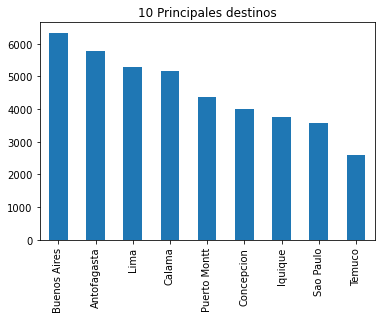

In [16]:
# 10 Principales destinos 
df["SIGLADES"].value_counts().head(9).plot(kind="bar")
plt.title("10 Principales destinos")
plt.show()

In [17]:
# % acumulado top 10 destinos
perc_vlo = round(df["SIGLADES"].value_counts().head(9).sum() / len(df),2)*100
print("Los 10 primeros destinos acumulan un {}% de los vuelos.".format(perc_vlo))

Los 10 primeros destinos acumulan un 60.0% de los vuelos.


In [18]:
# Estacionalidad de vuelos durante el año, por destino
df_destinos = df[df["AÑO"]!=2018].groupby(["SIGLADES", "AÑO", "MES"])["SIGLAORI"].count().reset_index()

In [19]:
# Rename columnas y crea fecha
df_destinos = df_destinos.rename(columns={"SIGLAORI":"COUNT", "AÑO":"year", "MES":"month"})
df_destinos["day"] = 1
df_destinos["FECHA"] = pd.to_datetime(df_destinos[["year", "month", "day"]], format="%Y/%m")

In [20]:
# Pivot para obtener destinos como columnas
df_destinos_piv = df_destinos.pivot(index="FECHA", columns="SIGLADES", values="COUNT")

In [21]:
# Eliminamos destinos sin presencia en todos los meses
df_destinos_piv = df_destinos_piv.dropna(axis=1, how="any")

In [22]:
# Mantenemos solo destinos los 10 con mayor flujo durante el año, con fines de visualización
lista_top10_dest = df["SIGLADES"].value_counts().head(9).index.tolist()

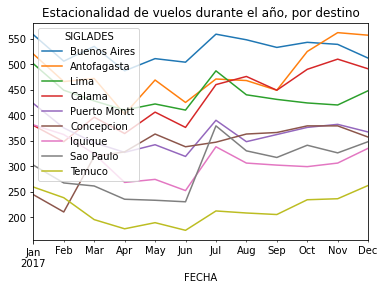

In [23]:
# Grafico estacionalidad de los top 10 destinos
df_destinos_piv[lista_top10_dest].plot()
plt.title("Estacionalidad de vuelos durante el año, por destino")
plt.show()

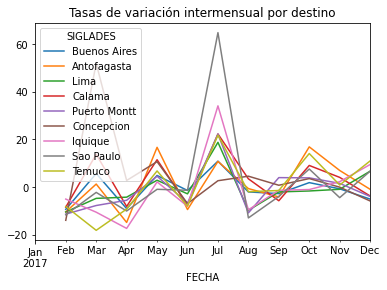

In [24]:
# Tasas de variación intermensual por destino
round(df_destinos_piv[lista_top10_dest].pct_change(1)*100, 1).plot()
plt.title("Tasas de variación intermensual por destino")
plt.show()

In [25]:
# Estacionalidad de vuelos durante el año, por "macrodestino" o tipo de vuelo (nacional-internacional)
df_macrodestinos = df[df["AÑO"]!=2018].groupby(["TIPOVUELO", "AÑO", "MES"])["SIGLAORI"].count().reset_index()

In [26]:
# Rename columnas y crea fecha
df_macrodestinos = df_macrodestinos.rename(columns={"SIGLAORI":"COUNT", "AÑO":"year", "MES":"month"})
df_macrodestinos["day"] = 1
df_macrodestinos["FECHA"] = pd.to_datetime(df_macrodestinos[["year", "month", "day"]], format="%Y/%m")

In [27]:
# Pivot para obtener destinos como columnas
df_macrodestinos_piv = df_macrodestinos.pivot(index="FECHA", columns="TIPOVUELO", values="COUNT")

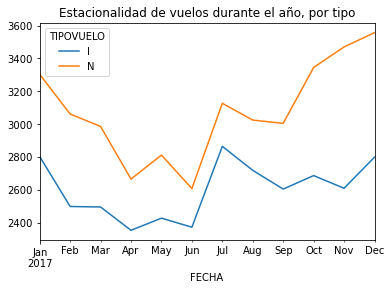

In [28]:
# Grafico estacionalidad de los macrodestinos
df_macrodestinos_piv.plot()
plt.title("Estacionalidad de vuelos durante el año, por tipo")
plt.show()

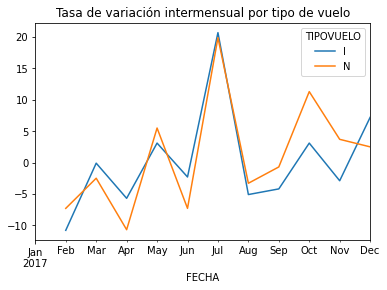

In [29]:
# Tasas de variación intermensual por macrodestinos
round(df_macrodestinos_piv.pct_change(1)*100, 1).plot()
plt.title("Tasa de variación intermensual por tipo de vuelo")
plt.show()

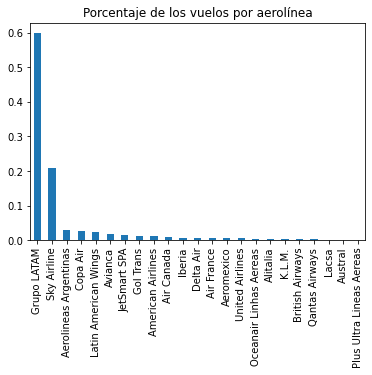

In [30]:
# % de los vuelos por operador
(df["OPERA"].value_counts() / len(df)).plot(kind="bar")
plt.title("Porcentaje de los vuelos por aerolínea")
plt.show()

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv <a name="seccion2"></a>

- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .


In [31]:
# temporada alta
import numpy as np
df["temporada_alta"] = np.where((df["Fecha-I"].between("2017-01-01 00:00:00", "2017-03-03 23:59:59") |
                                 df["Fecha-I"].between("2017-12-15 00:00:00", "2017-12-31 23:59:59") |
                                 df["Fecha-I"].between("2017-07-15 00:00:00", "2017-07-31 23:59:59") |
                                 df["Fecha-I"].between("2017-09-11 00:00:00", "2017-09-30 23:59:59") 
                                ),
                                1, 
                                0)

In [32]:
# dif_min
df["dif_min"] = (df["Fecha-O"] - df["Fecha-I"]).dt.total_seconds() / 60

In [33]:
# atraso_15
df["atraso_15"] = np.where(df["dif_min"] > 15, 1, 0) 

In [34]:
# periodo_dia
df["periodo_dia"] = np.where(df["Fecha-I"].dt.hour.between(5, 11), "mañana",
                            np.where(df["Fecha-I"].dt.hour.between(12, 18), "tarde", "noche"))

In [35]:
# Genera archivo synthetic features (engoding=latin1 para mantener caracteres)
synthetic_features = df[["temporada_alta", "dif_min", "atraso_15", "periodo_dia"]]
synthetic_features.to_csv("synthetic_features.csv", encoding="latin1")

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos? <a name="seccion3"></a>

**Respuesta**:
- De acuerdo a los gráficos que se muestran más abajo, todas las variables con excepción de TEMPORADA muestran potencial para lograr predecir una probabilidad de atraso de vuelos.
- Algunos ejemplos de estados que toman las variables y que son útiles para el objetivo final se resumen en el siguiente cuadro:

VARIABLE     | MAYOR PROB. DE ATRASO      | MENOR PROB. DE ATRASO   
:-------------:|:------------------------:|:-----------------:
**DESTINO** | COCHABAMBA, PUERTO STANLEY, QUITO | CURITIBA, PISCO, WASHINGTON
**AEROLINEA** | PLUS ULTRA, QUANTAS, AIR CANADA | AEROMEXICO, DELTA, UNITED
**MES** | JULIO, DICIEMBRE, OCTUBRE | MARZO, ABRIL
**DIA** | Viernes, Lunes | Sabado, Domingo
**TIPO VUELO** | INTERNACIONAL| NACIONAL


In [36]:
# Define función para obtener resultados por variable
# SUPUESTO: Solo se considera atraso si es mayor a 15 minutos

def get_tasa_atraso(df, var):
    result = round(df.groupby(var)["atraso_15"].sum() / df.groupby(var)["SIGLAORI"].count()*100,1)
    fig = result.plot(kind="bar", figsize=(12,4))
    plt.title("Tasa de atraso por {}".format(var))
    return plt.show(fig)

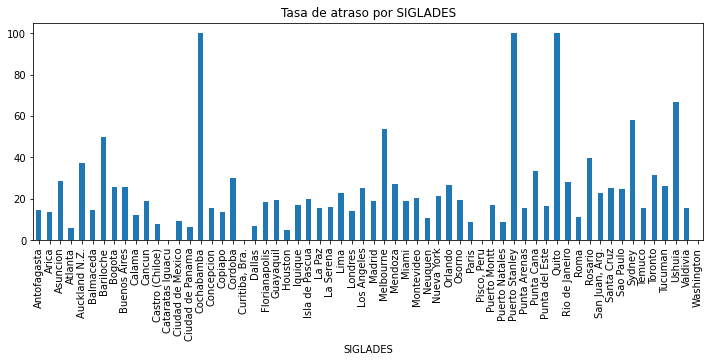

In [37]:
# Tasa de atraso por: DESTINO
get_tasa_atraso(df, "SIGLADES")

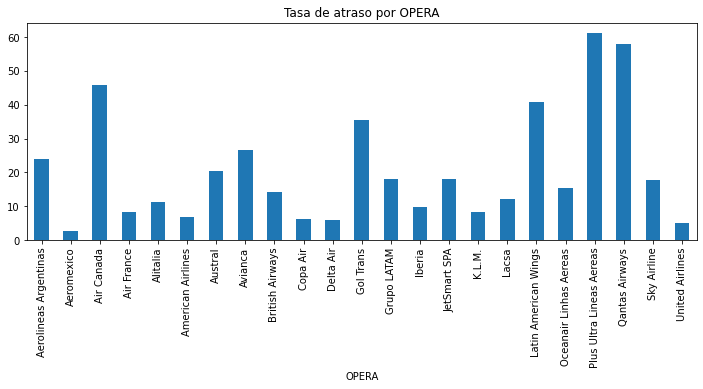

In [38]:
# Tasa de atraso por: AEROLINEA
get_tasa_atraso(df, "OPERA")

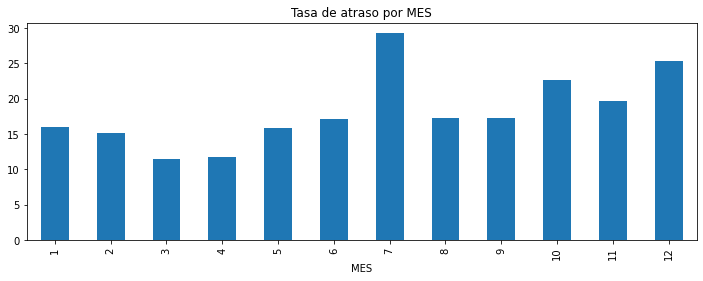

In [39]:
# Tasa de atraso por: MES
get_tasa_atraso(df, "MES")

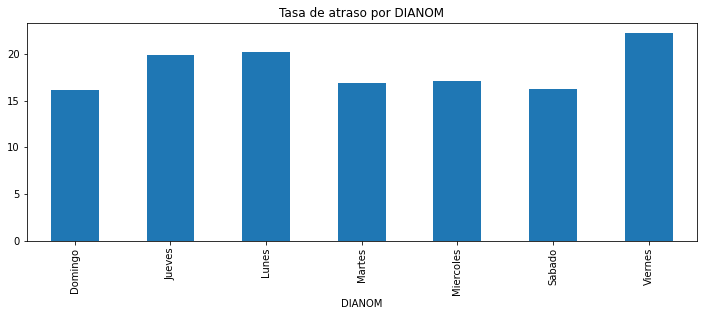

In [40]:
# Tasa de atraso por: DIA
get_tasa_atraso(df, "DIANOM")

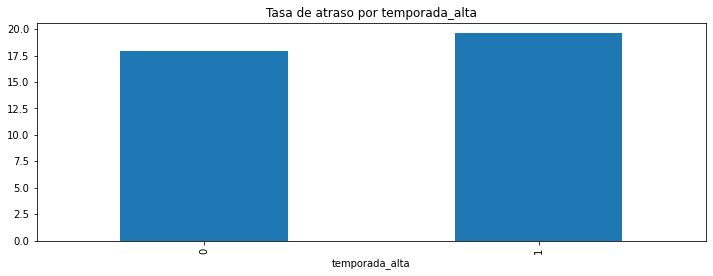

In [41]:
# Tasa de atraso por: TEMPORADA
get_tasa_atraso(df, "temporada_alta")

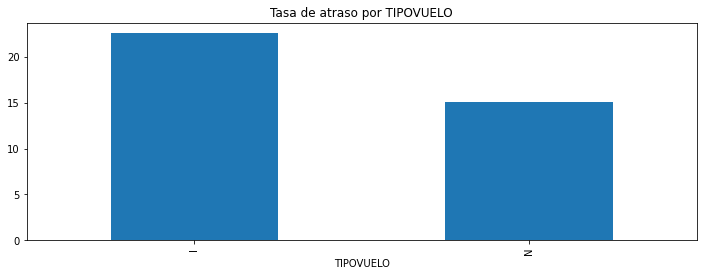

In [42]:
# Tasa de atraso por: TIPO DE VUELO
get_tasa_atraso(df, "TIPOVUELO")

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas <a name="seccion4"></a>

In [43]:
# Prepara dataset: 
# Utilizaremos los features DESTINO, AEROLINEA, MES, DIA, TEMPORADA, TIPO DE VUELO Y PERIODO DEL DIA
# Como taget (label) utilizaremos la variable dummy que indica si el vuelo salió atrasado (más de 15 min)

feat_name = ["SIGLADES", "OPERA", "MES", "DIANOM", "temporada_alta", "TIPOVUELO", "periodo_dia"]
features = df[feat_name]
label = df["atraso_15"]

In [44]:
# Corrige tipo de datos de MES y DIA
pd.options.mode.chained_assignment = None 
features["MES"] = features["MES"].astype(str)

In [45]:
# Se elimina "temporada_alta" del listado de features, pues no se transformará en dummy (ya lo es)
feat_name.remove("temporada_alta")

In [46]:
# Transformamos variables categóricas en dummies
dummies = pd.get_dummies(features[feat_name], prefix=feat_name)
features_dum = pd.concat([features,dummies], axis=1)
features_dum = features_dum.drop(feat_name, 1)
features_dum.shape

(68206, 110)

In [47]:
# Train test split: 80% de los datos para entrenamiento, 20% para testeo
from sklearn.model_selection import train_test_split

random_seed = 42

train_features, test_features = train_test_split(features_dum, test_size=0.2, random_state=random_seed)
train_label, test_label = train_test_split(label, test_size=0.2, random_state=random_seed)

In [48]:
# Chequea balanceo de clases en el training set
train_label.value_counts() / len(train_label)

0    0.815996
1    0.184004
Name: atraso_15, dtype: float64

Estamos en presencia de un problema de **clasificación supervisada binaria desbalanceada**, ya que solo un 18.4% de los vuelos salen con más de 15 minutos de atraso.

- Utilizaremos **SMOTE** (Synthetic Minority Over-sampling Technique, Chawla et al 2002) para aumentar de forma sintética la presencia de la clase minoritaria (atraso=1) en el training set. Según pruebas experimentales, realizando este paso se logra aumentar la performance en aprox. 5%.


Luego, será necesario utilizar métricas que permitan **corregir el desbalance**:
- Se elige utilizar la función **balanced_accuracy_score** de Sklearn, que entrega el promedio del Recall de cada clase
- Recall es equivalente a true positive rate. Luego, el balanced accuracy calcula el promedio del porcentaje de los verdaderos atrasos que son correctamente clasificados y el porcentaje de los verdaderos vuelos a tiempo que son correctamente clasificados.

In [49]:
# Balanceo del training set: SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_features_bal, train_label_bal = sm.fit_resample(train_features, train_label)

**Machine learning:**
- Se entrenan 4 tipos de algoritmos: Logistic Regression, Random Forest, Naive Bayes y Multilayer Perceptron.
- Todos estos escogidos por su reconocida capacidad para resolver problemas de clasificación supervisada.
- Previo a su entrenamiento, se realiza una breve búsqueda para obtener los mejores hiperparámetros para cada algoritmo.
    - Por motivos de reducir el tiempo de cómputo, no se realiza cross-validation.

In [50]:
# Define función que realiza grid search y obtiene resultados (balanced_accuracy) para el mejor modelo

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score

def get_best_params_results(model, param_grid, scoring="balanced_accuracy"):
    
    classifier = GridSearchCV(estimator=model, 
                              param_grid=param_grid, 
                              scoring=scoring).fit(train_features_bal, train_label_bal)
    
    predictions = classifier.predict(test_features)
    accuracy = balanced_accuracy_score(test_label, predictions)
    
    return classifier, accuracy

In [51]:
# Para ignorar warning messages
import warnings
warnings.filterwarnings('ignore')

# Para mantener track del tiempo de computo
import time

#### 1. Logistic regression

In [54]:
# Aplica grid search: LR
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = {"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

start = time.time()
lr_classifier, lr_accuracy = get_best_params_results(model=model, param_grid=param_grid)
lr_elapsed_time = time.time() - start
print("Tiempo total (LR): {} segundos.".format(round(lr_elapsed_time)))

Tiempo total (LR): 142 segundos.


#### 2. Random forest

In [76]:
# Aplica grid search: RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [100, 300],
              'max_depth' : [50, 100],
              'criterion' : ['gini', 'entropy']}

start = time.time()
rf_classifier, rf_accuracy = get_best_params_results(model=model, param_grid=param_grid)
rf_elapsed_time = time.time() - start
print("Tiempo total (RF): {} segundos.".format(round(rf_elapsed_time)))

Tiempo total (RF): 1214 segundos.


#### 3. Naive Bayes

In [52]:
# Naive Bayes: probamos 3 Kernels disponibles por separado
# 1. Multinomial
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
param_grid = {"alpha": [0.1, 1, 10]}

start = time.time()
nbm_classifier, nbm_accuracy = get_best_params_results(model=model, param_grid=param_grid)
nbm_elapsed_time = time.time() - start
print("Tiempo total (NB_M): {} segundos.".format(round(nbm_elapsed_time)))

Tiempo total (NB_M): 2 segundos.


In [85]:
# 2. Gaussian
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
param_grid = {"var_smoothing": [1e-11, 1e-9, 1e-7]}

start = time.time()
nbg_classifier, nbg_accuracy = get_best_params_results(model=model, param_grid=param_grid)
nbg_elapsed_time = time.time() - start
print("Tiempo total (NB_G): {} segundos.".format(round(nbg_elapsed_time)))

Tiempo total (NB_G): 4 segundos.


In [86]:
# 3. Bernoulli
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
param_grid = {"alpha": [10, 100, 1000]}

start = time.time()
nbb_classifier, nbb_accuracy = get_best_params_results(model=model, param_grid=param_grid)
nbb_elapsed_time = time.time() - start
print("Tiempo total (NB_B): {} segundos.".format(round(nbb_elapsed_time)))

Tiempo total (NB_B): 3 segundos.


#### 4. Multilayer perceptron

In [89]:
# Aplica grid search: MLP, Adam optimizer, Early Stopping
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=1, solver='adam', max_iter=100,
                      verbose=False, early_stopping=True)
param_grid = {'hidden_layer_sizes': [(50,), (100, 100), (200, 200)]}

start = time.time()
mlp_classifier, mlp_accuracy = get_best_params_results(model=model, param_grid=param_grid)
mlp_elapsed_time = time.time() - start
print("Tiempo total (MLP): {} segundos.".format(round(mlp_elapsed_time)))

Tiempo total (MLP): 620 segundos.


## 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance? <a name="seccion5"></a>

**Respuesta:**

- De los 4 modelos entrenados, el de mayor performance resulta ser **Naive Bayes** (Multinomial, alpha=1.0), alcanzando un accuracy balanceado de **62.5%**.
- Se utilizó **accuracy balanceado** como medida de performance, pues estamos frente a un problema de clasificación binaria desbalanceado, lo que hace necesario utilizar el promedio del Recall (true positive rate) de ambas clases (0,1).
- Adicionalmente, los modelos pueden ser evaluados en términos del **tiempo de cómputo** necesario para realizar el entrenamiento y predicción. En este ámbito, Naive Bayes destaca como el modelo de mayor eficiencia pues toma **2 segundos** en realizar ambas tareas, comparado con 28 de Logistic Regression, 152 de Random Forest y 206 de Multilayer Perceptron (tiempo promedio por modelo).
- Naive Bayes es un **modelo probabilístico** de clasificación supervisada que se basa en un enfoque de **aprendizaje Bayesiano**. El algoritmo intenta obtener la probabilidad a posteriori de que una observación pertenezca a una cierta clase, dado el set de atributos disponible: P(y=c<sub>i</sub>| X). Para lograrlo, el modelo se entrena utilizando la información disponible en el set de entrenamiento (_likelihood_): la probabilidad de observar los atributos, dados los valores que toman las clases (P(X|y=c<sub>i</sub>)). La predicción es determinada según la clase más probable de ser observada (MAP: maximum a posteriori hypotesis).
- La elección de este modelo se basó en su reconocida eficacia en la resolución de problemas supervisados de clasificación, lo cual lo hace uno de los algoritmos más utilizados en aplicaciones similares al ejemplo del desafío.
- Para evaluar las variables de mayor influencia en la predicción se pueden utilizar los resultados que entrega **Random Forest** sobre la capacidad que tienen estas para reducir la entropía del set de datos. Este algoritmo construye un número determinado de árboles de decisión (300 en este caso), cada uno utilizando versiones parcialmente distintas de los datos de entrenamiento (muestreados mediante bootstrapping). De acuerdo a los resultados del modelo, los estados de las variables de mayor influencia en los atrasos son:
    - **DESTINOS: Londres, Puerto Natales, Punta Cana, Neuquén, Orlando, Tucumán, Melbourne.**
    - **AEROLINEAS: Austral, Plus Ultra.**
- La performance del modelo podría mejorarse incorporando más features que permitan una **mejor separabilidad de las clases**. Posiblemente, datos relacionados con:
    - Las condiciones climáticas en el aeropuerto en el momento del embarque
    - Información sobre grado de utilización del espacio aéreo en la hora planificada del vuelo
    - Cantidad de personal destinado a las tareas de apoyo al embarque


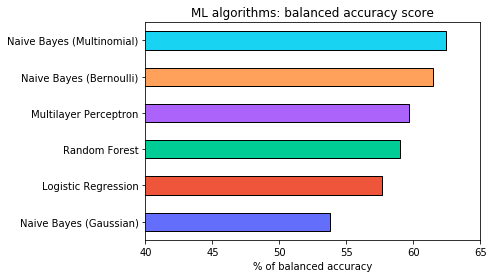

In [102]:
# Visualización del accuracy balanceado por modelo
models = ['Logistic Regression', 
          'Random Forest', 
          'Naive Bayes (Multinomial)',
          'Naive Bayes (Gaussian)',
          'Naive Bayes (Bernoulli)',
          'Multilayer Perceptron']

accuracy = np.array([lr_accuracy, 
                     rf_accuracy, 
                     nbm_accuracy, 
                     nbg_accuracy, 
                     nbb_accuracy, 
                     mlp_accuracy])

colors = ['#636EFA', 
          '#EF553B', 
          '#00CC96', 
          '#AB63FA', 
          '#FFA15A', 
          '#19D3F3']

accuracy = accuracy*100
accuracy_serie = pd.Series(accuracy, index=models).sort_values()
accuracy_serie.plot.barh(color=colors, ec='black')
plt.title('ML algorithms: balanced accuracy score')
plt.xlim(40,65)
plt.xlabel('% of balanced accuracy')
plt.show()

In [71]:
# Función para plotear matriz de confusión
import numpy as np
import seaborn as sns

def plot_matrix(cm, classes, title):
    ax = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g", xticklabels=classes, yticklabels=classes, cbar=False)
    ax.set(title=title, xlabel="Predicted label", ylabel="True label")

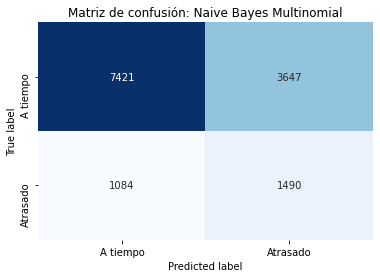

In [72]:
# Plot conf matrix
from sklearn.metrics import confusion_matrix
classes = ['A tiempo', 'Atrasado']
title = "Matriz de confusión: Naive Bayes Multinomial"
cm = confusion_matrix(test_label, nbm_classifier.predict(test_features))
plot_matrix(cm, classes, title)

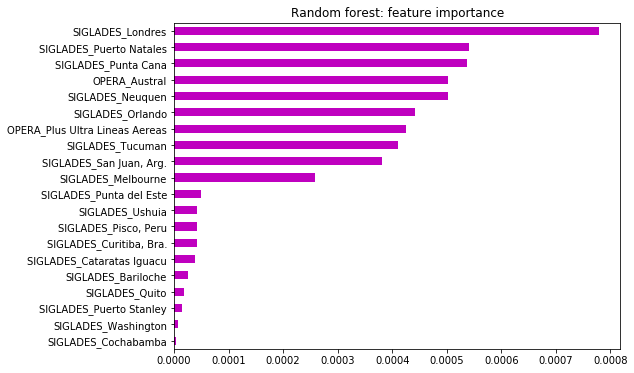

In [99]:
# RF feature importance
rf_importance = rf_classifier.best_estimator_.feature_importances_
rf_importance = pd.Series(rf_importance, index=train_features.columns).sort_values()[:20]
plt.figure(figsize=(8,6))
rf_importance.plot.barh(color='m')
plt.title('Random forest: feature importance')
plt.show()